<a href="https://colab.research.google.com/github/aromaldev/OCR-Malayalam/blob/master/Alexnet%20with%20SVM%20-%2030%20Classes" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Alex Net with SVM as Classification Layer

Ajay James, Manjusha J, Chandran Saravanan, "Malayalam Handwritten Character Recognition Using AlexNet Based Architecture", *Indonesian Journal of Electrical Engineering and Informatics (IJEEI)*,2018
ISSN 2089-3272, [DOI: 11591/ijeei.v6i4.518.](https://doi.org/10.11591/ijeei.v6i4.518)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!nvidia-smi

Tue Jun 22 02:08:48 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 465.27       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   47C    P0    30W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import pandas as pd
import numpy as np
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.regularizers import l2

#### Dataset Generators

In [ ]:
img_height = 227
img_width = 227
dim = 3
num_epochs=20
batch_size = 64
shape=(img_height,img_width)
input_shape=(img_height,img_width,dim)
num_of_classes=30

In [ ]:
% mkdir data
% cd data
! tar xvf /content/drive/MyDrive/data/thirtyclasses.tar

Streaming output truncated to the last 5000 lines.
121/397_2.jpg
121/596.jpg
121/170_96_3.jpg
121/2104_6.jpg
121/7511_4.jpg
121/2383_5.jpg
121/7250_1.jpg
121/208_96.jpg
121/1738_3.jpg
121/2072.jpg
121/1351_6.jpg
121/191_96_6.jpg
121/256_96_4.jpg
121/5388_4.jpg
121/4770_1.jpg
121/1221_4.jpg
121/3196_2.jpg
121/18354_5.jpg
121/6495_3.jpg
121/176_96_2.jpg
121/169_96_5.jpg
121/217_96_3.jpg
121/3012_6.jpg
121/2383_2.jpg
121/9845.jpg
121/664_5.jpg
121/7849_2.jpg
121/155_96_4.jpg
121/1351_1.jpg
121/1868_4.jpg
121/4901.jpg
121/220_96_1.jpg
121/2340_3.jpg
121/76_6.jpg
121/1336_6.jpg
121/202_96.jpg
121/197_96_6.jpg
121/207_96_1.jpg
121/7697_4.jpg
121/835_4.jpg
121/2353_5.jpg
121/9780_5.jpg
121/198_96_1.jpg
121/2601_3.jpg
121/7022_2.jpg
121/1481_3.jpg
121/154_96_5.jpg
121/225_96.jpg
121/111189_1.jpg
121/9780_6.jpg
121/7763.jpg
121/9460_1.jpg
121/159_96_4.jpg
121/6056.jpg
121/2183_3.jpg
121/1336_5.jpg
121/2680_4.jpg
121/2426.jpg
121/1672_4.jpg
121/7057_1.jpg
121/2183_4.jpg
121/7511_2.jpg
121/5449_6

In [ ]:
train_generator = image_dataset_from_directory(
    './',
    image_size=shape,
    batch_size=batch_size,
    color_mode='rgb',
    label_mode='categorical',
    shuffle=True,
    subset='training',
    seed=123,
    validation_split=0.2
)

val_generator = image_dataset_from_directory(
    './',
    image_size=shape,
    batch_size=batch_size,
    color_mode='rgb',
    label_mode='categorical',
    shuffle=True,
    subset='validation',
    seed=123,
    validation_split=0.2
)

Found 126511 files belonging to 30 classes.
Using 101209 files for training.
Found 126511 files belonging to 30 classes.
Using 25302 files for validation.


#### Model Architecture

In [ ]:
model=keras.models.Sequential([
    keras.layers.Conv2D(filters=128, kernel_size=(11,11), strides=(4,4), activation='relu', input_shape=(227,227,3)),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(2,2)),
    keras.layers.Conv2D(filters=256, kernel_size=(5,5), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(3,3)),
    keras.layers.Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(filters=256, kernel_size=(1,1), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(filters=256, kernel_size=(1,1), strides=(1,1), activation='relu', padding="same"),
    keras.layers.BatchNormalization(),
    keras.layers.MaxPool2D(pool_size=(2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(1024,activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(1024,activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(num_of_classes,kernel_regularizer=tf.keras.regularizers.l2(0.01)) # multiclass svm
])

In [ ]:
model.compile(
    loss='squared_hinge',
    optimizer=tf.optimizers.Adam(learning_rate=0.001),
    metrics=['accuracy']    
)

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 55, 55, 128)       46592     
_________________________________________________________________
batch_normalization_5 (Batch (None, 55, 55, 128)       512       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 27, 27, 128)       0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 27, 27, 256)       819456    
_________________________________________________________________
batch_normalization_6 (Batch (None, 27, 27, 256)       1024      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 9, 9, 256)         0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 9, 9, 256)        

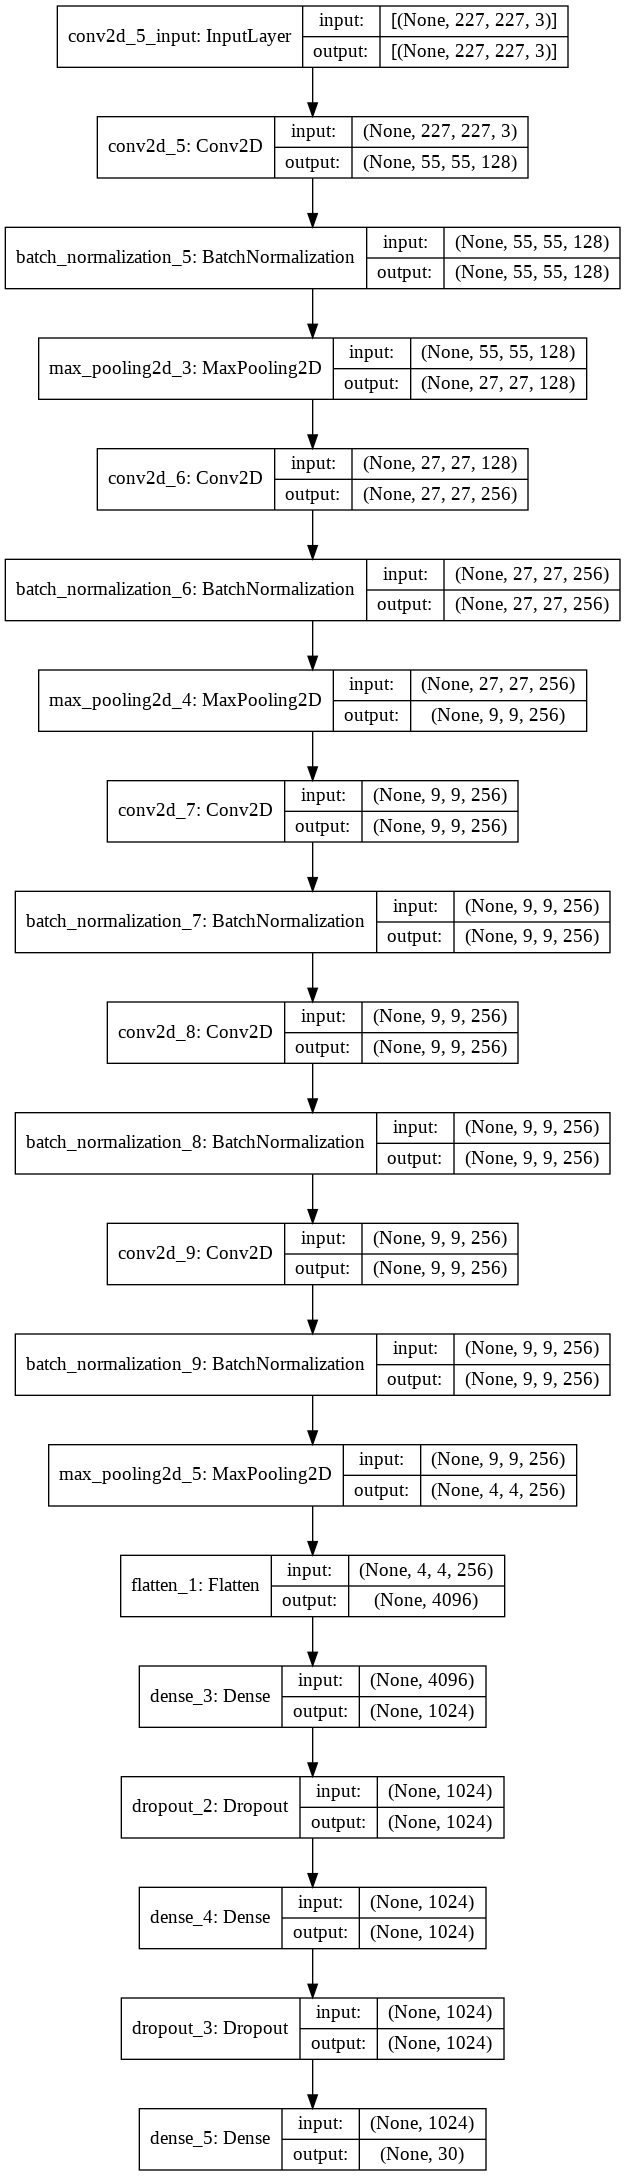

In [ ]:
tf.keras.utils.plot_model(
    model,
    to_file="model.png",
    show_shapes=True,
    show_dtype=False,
    show_layer_names=True,
    rankdir="TB",
    expand_nested=False,
    dpi=96,
)

#### Model Training

In [ ]:
es = tf.keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10)

history = model.fit(
    train_generator,
    epochs=num_epochs,
    validation_data=val_generator,
    callbacks=[es],
    batch_size=batch_size
)

Epoch 1/20
1582/1582 [==============================] - 143s 89ms/step - loss: 0.2043 - accuracy: 0.5114 - val_loss: 0.5428 - val_accuracy: 0.1554
Epoch 2/20
1582/1582 [==============================] - 141s 89ms/step - loss: 0.0353 - accuracy: 0.9057 - val_loss: 0.1196 - val_accuracy: 0.5503
Epoch 3/20
1582/1582 [==============================] - 140s 89ms/step - loss: 0.0268 - accuracy: 0.9407 - val_loss: 0.2611 - val_accuracy: 0.4194
Epoch 4/20
1582/1582 [==============================] - 140s 89ms/step - loss: 0.0230 - accuracy: 0.9541 - val_loss: 0.0361 - val_accuracy: 0.8921
Epoch 5/20
1582/1582 [==============================] - 142s 89ms/step - loss: 0.0213 - accuracy: 0.9611 - val_loss: 0.5132 - val_accuracy: 0.4529
Epoch 6/20
1582/1582 [==============================] - 141s 89ms/step - loss: 0.0198 - accuracy: 0.9645 - val_loss: 0.5750 - val_accuracy: 0.1152
Epoch 7/20
1582/1582 [==============================] - 141s 89ms/step - loss: 0.0182 - accuracy: 0.9699 - val_loss: 0

396/396 - 23s - loss: 0.0185 - accuracy: 0.9784


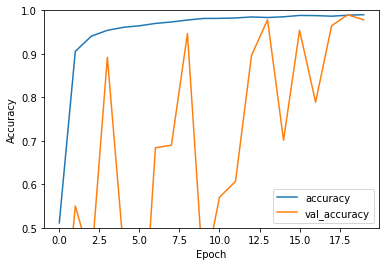

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(val_generator, verbose=2)

In [ ]:
model.save('/content/drive/MyDrive/data/alexmodelsvm3.h5')

In [ ]:
model = tf.keras.models.load_model('/content/drive/MyDrive/data/alexmodelsvm3.h5')

#### Getting Class Names


In [ ]:
class_index = train_generator.class_names

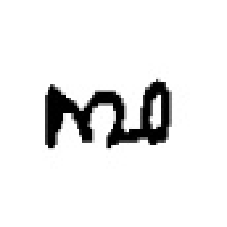

In [ ]:
img = tf.keras.preprocessing.image.load_img('/content/data/117/102.jpg'
    , color_mode='rgb', target_size=shape,interpolation='nearest')

h = []
array = tf.keras.preprocessing.image.img_to_array(img)
h.append(array)
h = np.array(h)

img

In [ ]:
class_index[model.predict(h).argmax()]

'117'

#### Testing

In [ ]:
import cv2
from pathlib import Path
from sklearn.utils import Bunch
import numpy as np

def load_images(container_path, dimension=(64, 64)): 
    image_dir = Path(container_path)
    folders = [directory for directory in image_dir.iterdir() if directory.is_dir()]
    categories = [fo.name for fo in folders]
    descr = "Malayalam Character classification dataset"
    images = []
    flat_data = []
    target = []
    Sreq = dimension[0]
    for i, direc in enumerate(folders):
        j = 0
        for image_path in direc.iterdir():
            img = tf.keras.preprocessing.image.load_img(str(image_path),color_mode='rgb', target_size=shape,interpolation='nearest')
            image = tf.keras.preprocessing.image.img_to_array(img)
            images.append(image)
            target.append(i)
            j += 1
            if j == 500:
              break
        print(f'Folder {i+1} of {len(folders)} Retreived')
    flat_data = np.array(flat_data)
    target = np.array(target)
    images = np.array(images)

    return Bunch(data=images,
                 target=target,
                 target_names=categories,
                 DESCR=descr)
    
dataset = load_images('./')

Folder 1 of 30 Retreived
Folder 2 of 30 Retreived
Folder 3 of 30 Retreived
Folder 4 of 30 Retreived
Folder 5 of 30 Retreived
Folder 6 of 30 Retreived
Folder 7 of 30 Retreived
Folder 8 of 30 Retreived
Folder 9 of 30 Retreived
Folder 10 of 30 Retreived
Folder 11 of 30 Retreived
Folder 12 of 30 Retreived
Folder 13 of 30 Retreived
Folder 14 of 30 Retreived
Folder 15 of 30 Retreived
Folder 16 of 30 Retreived
Folder 17 of 30 Retreived
Folder 18 of 30 Retreived
Folder 19 of 30 Retreived
Folder 20 of 30 Retreived
Folder 21 of 30 Retreived
Folder 22 of 30 Retreived
Folder 23 of 30 Retreived
Folder 24 of 30 Retreived
Folder 25 of 30 Retreived
Folder 26 of 30 Retreived
Folder 27 of 30 Retreived
Folder 28 of 30 Retreived
Folder 29 of 30 Retreived
Folder 30 of 30 Retreived


In [ ]:
y_pred = model.predict(dataset.data)

In [ ]:
dataset.data = dataset.data.reshape((dataset.data.shape[0],227,227,3))

In [ ]:
y_pred = model.predict(dataset.data)
y_pred = np.argmax(y_pred,axis=-1)

y_index = [class_index[i] for i in y_pred]
y_true = [dataset.target_names[i] for i in dataset.target]

##### Classification Report

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_true,y_index))

              precision    recall  f1-score   support

         102       1.00      1.00      1.00       500
         104       0.94      0.97      0.95       500
         105       0.96      0.99      0.97       500
         106       0.99      0.98      0.98       500
         107       0.94      0.99      0.96       500
         108       0.98      0.96      0.97       500
         109       1.00      1.00      1.00       500
         110       1.00      1.00      1.00       500
         111       1.00      1.00      1.00       500
         112       1.00      0.96      0.98       500
         115       1.00      0.94      0.97       500
         116       1.00      0.98      0.99       500
         117       0.99      0.98      0.99       500
         118       0.99      1.00      1.00       500
         119       1.00      0.99      0.99       500
         120       0.99      0.98      0.99       500
         121       0.93      0.98      0.96       500
         122       0.98    

##### Confusion Matrix

In [ ]:
print(confusion_matrix(y_true,y_index))

[[498   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   1   0   1   0   0]
 [  0 485   1   0   3   0   0   0   0   0   0   0   1   0   0   0   1   0
    0   0   0   0   0   0   0   0   0   9   0   0]
 [  0   1 493   0   4   1   0   0   0   0   0   0   1   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   6   0 488   5   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   1   0   0]
 [  0   2   1   0 493   3   0   0   0   0   0   0   0   0   0   1   0   0
    0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   4   4   1   7 481   0   0   0   0   0   0   0   0   0   0   2   0
    0   0   0   0   0   0   0   1   0   0   0   0]
 [  0   0   1   0   0   0 498   1   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0 500   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0   0   0]
